In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import sys
sys.path.append("..")
from experiment.utils_experiment import * 

In [14]:
import matplotlib
font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

matplotlib.rc('font', **font)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# path with results
file_path = "/Users/melodiemonod/projects/2024/deep_rl_liquidation/experiment_1/"

In [4]:
# Define a color palette
color_optimal = "#DD5746" 
color_ddpg ="#4793AF"

In [5]:
# Exponential kernel
job_name = "experiment_1-exponential_decay_kernel"
output_path_ex = file_path + job_name + "/"

# Power Law kernel
job_name = "experiment_1-power_law_kernel"
output_path_pl = file_path + job_name + "/"

# Linear Resilience kernel 1
job_name = "experiment_1-linear_resilience_kernel_0.05" 
output_path_lr1 = file_path + job_name + "/"

# Linear Resilience kernel 2
job_name = "experiment_1-linear_resilience_kernel_0.5"
output_path_lr2 = file_path + job_name + "/"

In [6]:
# Load outputs
iterations_ex = load_object(output_path_ex, "iterations")
best_actions_ex = load_object(output_path_ex, "best_actions")
optimal_actions_ex = load_object(output_path_ex, "optimal_actions")

iterations_pl = load_object(output_path_pl, "iterations")
best_actions_pl = load_object(output_path_pl, "best_actions")
optimal_actions_pl = load_object(output_path_pl, "optimal_actions")

iterations_lr1 = load_object(output_path_lr1, "iterations")
best_actions_lr1 = load_object(output_path_lr1, "best_actions")
optimal_actions_lr1 = load_object(output_path_lr1, "optimal_actions")

iterations_lr2 = load_object(output_path_lr2, "iterations")
best_actions_lr2 = load_object(output_path_lr2, "best_actions")
optimal_actions_lr2 = load_object(output_path_lr2, "optimal_actions")

In [9]:
# Transform outputs to pandas dataframe
pd_best_actions_ex = pd.DataFrame([x.numpy() for x in best_actions_ex])
pd_optimal_actions_ex = pd.DataFrame(np.ravel(optimal_actions_ex), columns=['optimal_strat'])

pd_best_actions_pl = pd.DataFrame([x.numpy() for x in best_actions_pl])
pd_optimal_actions_pl = pd.DataFrame(np.ravel(optimal_actions_pl), columns=['optimal_strat'])

pd_best_actions_lr1 = pd.DataFrame([x.numpy() for x in best_actions_lr1])
pd_optimal_actions_lr1 = pd.DataFrame(np.ravel(optimal_actions_lr1), columns=['optimal_strat'])

pd_best_actions_lr2 = pd.DataFrame([x.numpy() for x in best_actions_lr2])
pd_optimal_actions_lr2 = pd.DataFrame(np.ravel(optimal_actions_lr2), columns=['optimal_strat'])

/var/folders/f_/vxkztmj55t58xvh49q60z48w0000gn/T/ipykernel_12227/2557051853.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(1, 4, figsize=(13,3.5))


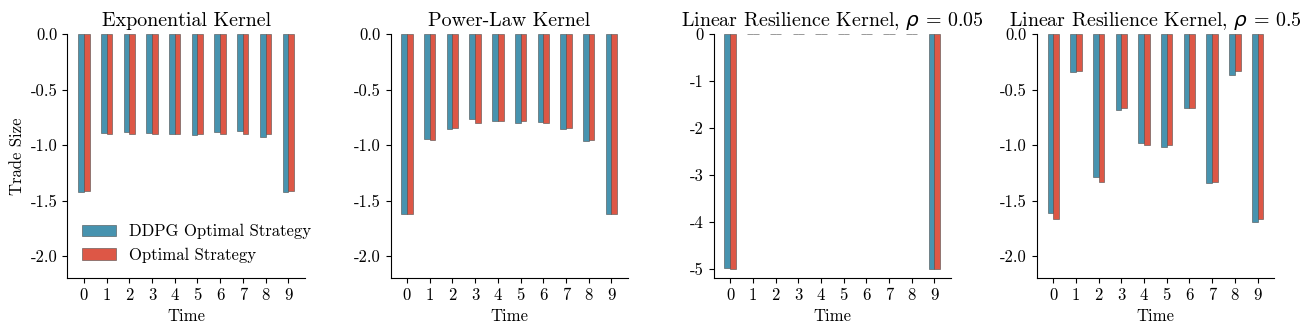

In [15]:
plot_iteration_ex = max(iterations_ex)
plot_iteration_pl = max(iterations_pl)
plot_iteration_lr1 = max(iterations_lr1)
plot_iteration_lr2 = max(iterations_lr2)

plt_iteration_idx_ex =  iterations_ex.index(min(iterations_ex, key=lambda x: abs(x - plot_iteration_ex))) 
plt_iteration_idx_pl =  iterations_pl.index(min(iterations_pl, key=lambda x: abs(x - plot_iteration_pl))) 
plt_iteration_idx_lr1 =  iterations_lr1.index(min(iterations_lr1, key=lambda x: abs(x - plot_iteration_lr1))) 
plt_iteration_idx_lr2 =  iterations_lr2.index(min(iterations_lr2, key=lambda x: abs(x - plot_iteration_lr2))) 

legend_ex = 'Exponential Kernel'
legend_pl = 'Power-Law Kernel'
legend_lr1 = r'Linear Resilience Kernel, $\rho$ = 0.05'
legend_lr2 = r'Linear Resilience Kernel, $\rho$ = 0.5'

# Create the main figure with subplots
fig, axs = plt.subplots(1, 4, figsize=(13,3.5))

# # # Insert plots on bottom row
width = 0.25 # width of bars
xticks = range(0, 10, 1)

# Exponential kernel
axs[0].bar(pd_best_actions_ex.iloc[0].index-width/2,pd_best_actions_ex.iloc[plt_iteration_idx_ex],width,edgecolor='#4d4d4d', linewidth=0.4, color = color_ddpg, label='DDPG Optimal Strategy',)
axs[0].bar(pd_optimal_actions_ex.index+width/2,pd_optimal_actions_ex['optimal_strat'],width,edgecolor='#4d4d4d', linewidth=0.4, color = color_optimal, label='Optimal Strategy', )
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Trade Size')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].set_title(legend_ex)
axs[0].set_ylim([-2.2,0])
axs[0].set_xticks(xticks)
axs[0].legend(fancybox=False, shadow=False, frameon = False)

# Power-Law kernel
axs[1].bar(pd_best_actions_pl.iloc[1].index-width/2,pd_best_actions_pl.iloc[plt_iteration_idx_pl],width,edgecolor='#4d4d4d', linewidth=0.4,  color = color_ddpg, label='DDPG Optimal Strategy',)
axs[1].bar(pd_optimal_actions_pl.index+width/2,pd_optimal_actions_pl['optimal_strat'],width, edgecolor='#4d4d4d', linewidth=0.4, color = color_optimal, label='Optimal Strategy', )
axs[1].set_xlabel('Time')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].set_title(legend_pl)
axs[1].set_ylim([-2.2,0])
axs[1].set_xticks(xticks)

# Linear resilience kernel 1
axs[2].bar(pd_best_actions_lr1.iloc[2].index-width/2,pd_best_actions_lr1.iloc[plt_iteration_idx_lr1],width,edgecolor='#4d4d4d', linewidth=0.4, color = color_ddpg)
axs[2].bar(pd_optimal_actions_lr1.index+width/2,pd_optimal_actions_lr1['optimal_strat'],width,edgecolor='#4d4d4d', linewidth=0.4, color = color_optimal)
axs[2].set_xlabel('Time')
#axs[2].set_ylabel('Trade Size')
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].set_title(legend_lr1)
axs[2].set_ylim([-5.2,0])
axs[2].set_xticks(xticks)

# Linear resilience kernel 2
axs[3].bar(pd_best_actions_lr2.iloc[2].index-width/2,pd_best_actions_lr2.iloc[plt_iteration_idx_lr2],width,edgecolor='#4d4d4d', linewidth=0.4, color = color_ddpg,  label='DDPG Optimal Strategy',)
axs[3].bar(pd_optimal_actions_lr2.index+width/2,pd_optimal_actions_lr2['optimal_strat'],width,edgecolor='#4d4d4d', linewidth=0.4, color = color_optimal, label='Optimal Strategy',)
axs[3].set_xlabel('Time')
axs[3].spines['right'].set_visible(False)
axs[3].spines['top'].set_visible(False)
axs[3].set_title(legend_lr2)
axs[3].set_ylim([-2.2,0])
axs[3].set_xticks(xticks)


fig.tight_layout()
fig.subplots_adjust(hspace=0.3) 
fig.savefig(output_path_ex + "convergence_strategies.pdf",dpi=175)

# Exponential kernel
job_name = "experiment_1-exponential_decay_kernel"
output_path_ex = file_path + job_name + "/"

# Power Law kernel
job_name = "experiment_1-power_law_kernel"
output_path_pl = file_path + job_name + "/"

# Linear Resilience kernel 1
job_name = "experiment_1-linear_resilience_kernel_0.05" 
output_path_lr1 = file_path + job_name + "/"

# Linear Resilience kernel 2
job_name = "experiment_1-linear_resilience_kernel_0.5"
output_path_lr2 = file_path + job_name + "/"